 # Authenticate to Twitter

In [1]:
# Import tweepy to work with the twitter API
import tweepy as tw
# Import numpy and pandas to work with dataframes
import numpy as np
import pandas as pd
# Import seaborn and matplotlib for viz
from matplotlib import pyplot as plt


In [2]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [21]:

# Authenticate
auth = tw.OAuthHandler(consumer_key, consumer_secret)
# Set Tokens
auth.set_access_token(access_token, access_token_secret)
# Instantiate API
api = tw.API(auth, wait_on_rate_limit=True)


#  Get Tweets

In [22]:
keywords=["#NigeriaElection","#NigeriaDecides","Nigeria politics","#tinubu","#atiku","#peterobi"]

In [24]:
import time

Tweet=[]
for keyword in keywords:
    query = tw.Cursor(api.search_tweets, q=keyword).items(3000)
    
    for tweet in query:
        tweets = {'Tweet':tweet.text, 'Timestamp':tweet.created_at} 
        #print(tweets)
        Tweet.append(tweets)
        time.sleep(0.0005)
    

Rate limit reached. Sleeping for: 395
Rate limit reached. Sleeping for: 715
Rate limit reached. Sleeping for: 707
Rate limit reached. Sleeping for: 715


In [37]:
df = pd.DataFrame.from_dict(Tweet)
df.head()


,Tweet,Timestamp
0,RT @SHADEIN3: We want a Nigeria that is built ...,2023-02-02 08:12:57+00:00
1,RT @SHADEIN3: We want a Nigeria that is built ...,2023-02-02 08:12:16+00:00
2,RT @SHADEIN3: Leaders at all levels should kno...,2023-02-02 08:11:48+00:00
3,RT @SHADEIN3: Are you concerned your vote will...,2023-02-02 08:10:42+00:00
4,RT @SHADEIN3: We can secure the future of our ...,2023-02-02 08:10:36+00:00


In [38]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12998 entries, 0 to 12997
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Tweet      12998 non-null  object             
 1   Timestamp  12998 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 203.2+ KB


In [39]:
tinubu_handle = ['Tinubu', 'Bola Ahmed Tinubu', 'OfficalABAT', 'Tinubu\'s',"Tinubu's","#tinubu"]
atiku_handle = ['Akitu', 'Atiku Abubakar', 'AtikuOkuwa2023']
obi_handle=["PeterObi","obidati","Peter Obi","@PeterObi","PO"]

In [40]:
def identify_subject(tweet, refs):
    flag = 0
    for ref in refs:
        if tweet.find(ref) != -1:
            flag = 1
    return flag
df['Tinubu'] = df['Tweet'].apply(lambda x: identify_subject(x, tinubu_handle))
df['Atiku'] = df['Tweet'].apply(lambda x: identify_subject(x, atiku_handle))
df['Obi'] = df['Tweet'].apply(lambda x: identify_subject(x, obi_handle))
df.head(10)


,Tweet,Timestamp,Tinubu,Atiku,Obi
0,RT @SHADEIN3: We want a Nigeria that is built ...,2023-02-02 08:12:57+00:00,0,0,0
1,RT @SHADEIN3: We want a Nigeria that is built ...,2023-02-02 08:12:16+00:00,0,0,0
2,RT @SHADEIN3: Leaders at all levels should kno...,2023-02-02 08:11:48+00:00,0,0,0
3,RT @SHADEIN3: Are you concerned your vote will...,2023-02-02 08:10:42+00:00,0,0,0
4,RT @SHADEIN3: We can secure the future of our ...,2023-02-02 08:10:36+00:00,0,0,0
5,Do you feel like your voice isn't being heard?...,2023-02-02 02:00:19+00:00,0,0,0
6,It's a new month that's coming with things and...,2023-02-01 16:55:52+00:00,0,0,0
7,RT @thedreamnigeria: Your vote shapes the futu...,2023-02-01 12:36:31+00:00,0,0,0
8,RT @thedreamnigeria: Your vote shapes the futu...,2023-02-01 11:02:54+00:00,0,0,0
9,"RT @gchahal: Due to these issues, Pantami anno...",2023-02-01 10:50:29+00:00,0,0,0


'RT @SHADEIN3: We want a Nigeria that is built on truth and diligence, where effort and creativity is rewarded.\n\nVote for a new Nigeria! 🇳🇬…'

In [31]:
# Import stopwords
import nltk
from nltk.corpus import stopwords
# Import textblob
from textblob import Word, TextBlob

In [32]:
#nltk.download('stopwords')
#nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['RT',"#NigeriaElection","#NigeriaDecides","Nigeria politics","#tinubu","#atiku","#peterobi",]


In [41]:
def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)

    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)
df['Processed Tweet'] = df['Tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()


,Tweet,Timestamp,Tinubu,Atiku,Obi,Processed Tweet
0,RT @SHADEIN3: We want a Nigeria that is built ...,2023-02-02 08:12:57+00:00,0,0,0,@SHADEIN3: We want Nigeria built truth diligen...
1,RT @SHADEIN3: We want a Nigeria that is built ...,2023-02-02 08:12:16+00:00,0,0,0,@SHADEIN3: We want Nigeria built truth diligen...
2,RT @SHADEIN3: Leaders at all levels should kno...,2023-02-02 08:11:48+00:00,0,0,0,@SHADEIN3: Leaders level know documents. #mind...
3,RT @SHADEIN3: Are you concerned your vote will...,2023-02-02 08:10:42+00:00,0,0,0,@SHADEIN3: Are concerned vote count? Vote anyw...
4,RT @SHADEIN3: We can secure the future of our ...,2023-02-02 08:10:36+00:00,0,0,0,@SHADEIN3: We secure future child action decis...


In [43]:
# Calculate polarity
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df[['Processed Tweet', 'Tinubu', 'Atiku',"Obi", 'polarity', 'subjectivity']].head()

,Processed Tweet,Tinubu,Atiku,Obi,polarity,subjectivity
0,@SHADEIN3: We want Nigeria built truth diligen...,0,0,0,0.170455,0.454545
1,@SHADEIN3: We want Nigeria built truth diligen...,0,0,0,0.170455,0.454545
2,@SHADEIN3: Leaders level know documents. #mind...,0,0,0,0.000000,0.000000
3,@SHADEIN3: Are concerned vote count? Vote anyw...,0,0,0,0.000000,0.000000
4,@SHADEIN3: We secure future child action decis...,0,0,0,0.166667,0.275000


In [46]:
display(df[df['Tinubu']==1][['Tinubu','polarity','subjectivity']].groupby('Tinubu').agg([np.mean, np.max, np.min, np.median]),
df[df['Atiku']==1][['Atiku','polarity','subjectivity']].groupby('Atiku').agg([np.mean, np.max, np.min, np.median]),
       df[df['Obi']==1][['Obi','polarity','subjectivity']].groupby('Obi').agg([np.mean, np.max, np.min, np.median]))

polarity                   subjectivity                    
            mean  amax amin median         mean amax amin    median
Tinubu                                                             
1       0.103327  0.85 -1.0    0.0     0.348059  1.0  0.0  0.289773

polarity                  subjectivity                    
           mean amax amin median         mean amax amin    median
Atiku                                                            
1      0.057669  0.8 -0.5    0.0     0.371467  1.0  0.0  0.366667

polarity                  subjectivity                 
         mean amax amin median         mean amax amin median
Obi                                                         
1   -0.038126  1.0 -1.0    0.0     0.271472  1.0  0.0    0.0

In [47]:

df["sentiment"]=np.where(df["polarity"]>0,"Positive","Negative")
df["sentiment"][df["polarity"]==0]="Neutral"
df.tail()


C:\Users\Dell\AppData\Local\Temp\ipykernel_15888\3765073673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment"][df["polarity"]==0]="Neutral"


,Tweet,Timestamp,Tinubu,Atiku,Obi,Processed Tweet,polarity,subjectivity,sentiment
12993,"RT @OGersh: From Feb 1, up till election day F...",2023-01-31 19:40:00+00:00,0,0,0,"@OGersh: From Feb 1, till election day Feb. 25...",0.250000,0.250000,Positive
12994,The people after Godwin Emefiele are bigger th...,2023-01-31 19:38:51+00:00,0,0,0,The people Godwin Emefiele bigger Buhari too. ...,0.000000,0.666667,Neutral
12995,RT @mamaariella: When I listened to PO speak i...,2023-01-31 19:38:01+00:00,0,0,1,@mamaariella: When I listened PO speak London ...,0.400000,0.900000,Positive
12996,"RT @OGersh: From Feb 1, up till election day F...",2023-01-31 19:38:00+00:00,0,0,0,"@OGersh: From Feb 1, till election day Feb. 25...",0.250000,0.250000,Positive
12997,RT @KomeNicee: We obidients are also live at t...,2023-01-31 19:36:12+00:00,0,0,0,@KomeNicee: We obidients also live Uyo stadium...,0.193182,0.500000,Positive


In [49]:
ma=["Processed Tweet","polarity","subjectivity","sentiment"]
tinubu_=df[df["Tinubu"]==1][ma]
atiku_=df[df["Atiku"]==1][ma]
obi_=df[df["Obi"]==1][ma]

In [53]:
print(f"The tweets that concerns Tinubu is {len(tinubu_)} tweets")
print("---------------------------------------------------------------")
print(f"The tweets that concerns Tinubu is {len(atiku_)} tweets")
print("---------------------------------------------------------------")

print(f"The tweets that concerns Tinubu is {len(obi_)} tweets")
print("---------------------------------------------------------------")



The tweets that concerns Tinubu is 1067 tweets
---------------------------------------------------------------
The tweets that concerns Tinubu is 138 tweets
---------------------------------------------------------------
The tweets that concerns Tinubu is 4056 tweets
---------------------------------------------------------------


In [55]:

count_tinubu=tinubu_.groupby('sentiment').count()
print(count_tinubu)
count_atiku=atiku_.groupby('sentiment').count()
print(count_atiku)
count_obi=obi_.groupby('sentiment').count()
print(count_obi)


           Processed Tweet  polarity  subjectivity
sentiment                                         
Negative               111       111           111
Neutral                584       584           584
Positive               372       372           372
           Processed Tweet  polarity  subjectivity
sentiment                                         
Negative                23        23            23
Neutral                 65        65            65
Positive                50        50            50
           Processed Tweet  polarity  subjectivity
sentiment                                         
Negative              1317      1317          1317
Neutral               2237      2237          2237
Positive               502       502           502


In [60]:
name=["Tinubu","Atiku","Obi"]
list_pos=[count_tinubu['polarity'][2],count_atiku['polarity'][2],count_obi["polarity"][2]]
#list_neut=[count_tinubu['polarity'][1],count_atiku['polarity'][1],count_obi["polarity"][1]]
list_neg=[count_tinubu['polarity'][0],count_atiku['polarity'][0],count_obi["polarity"][0]]

import plotly.graph_objects as go
fig=go.Figure(data=[
 go.Bar(name='+ve',x=name, y=list_pos,text=list_pos),
 #go.Bar(name='neutral', x=name, y=list_neut),
    go.Bar(name='-ve', x=name, y=list_neg,text=list_neg)
    
])
fig.update_layout(barmode='group')
fig.show()




In [62]:

Tinubu= df[df['Tinubu']==1][['Timestamp', 'polarity','subjectivity']]
Tinubu = Tinubu.sort_values(by='Timestamp', ascending=True)
Tinubu['MA Polarity'] = Tinubu.polarity.rolling(10, min_periods=3).mean()
Tinubu['MA Subjectivity'] = Tinubu.subjectivity.rolling(10, min_periods=3).mean()


Atiku = df[df['Atiku']==1][['Timestamp', 'polarity','subjectivity']]
Atiku = Atiku.sort_values(by='Timestamp', ascending=True)
Atiku['MA Polarity'] = Atiku.polarity.rolling(10, min_periods=3).mean()
Atiku['MA Subjectivity'] = Atiku.subjectivity.rolling(10, min_periods=3).mean()

Obi = df[df['Obi']==1][['Timestamp', 'polarity','subjectivity']]
Obi = Obi.sort_values(by='Timestamp', ascending=True)
Obi['MA Polarity'] =Obi.polarity.rolling(10, min_periods=3).mean()
Obi['MA Subjectivity'] =Obi.subjectivity.rolling(10, min_periods=3).mean()


In [63]:
Atiku


,Timestamp,polarity,subjectivity,MA Polarity,MA Subjectivity
9921,2023-01-23 17:23:45+00:00,0.085227,0.227273,NaN,NaN
9896,2023-01-23 20:10:42+00:00,0.500000,0.750000,NaN,NaN
9887,2023-01-23 21:35:37+00:00,0.000000,0.000000,0.195076,0.325758
9884,2023-01-23 21:51:52+00:00,0.000000,0.000000,0.146307,0.244318
9883,2023-01-23 21:53:38+00:00,0.800000,0.400000,0.277045,0.275455
...,...,...,...,...,...
629,2023-02-01 14:02:11+00:00,0.000000,0.000000,0.180000,0.409444
462,2023-02-01 18:45:11+00:00,0.500000,0.500000,0.195000,0.394444
4086,2023-02-01 20:01:44+00:00,0.000000,0.250000,0.160000,0.354444
385,2023-02-01 20:57:38+00:00,0.000000,0.000000,0.125000,0.289444


C:\Users\Dell\AppData\Local\Temp\ipykernel_15888\288780871.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Dell\AppData\Local\Temp\ipykernel_15888\288780871.py:8: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Dell\AppData\Local\Temp\ipykernel_15888\288780871.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator



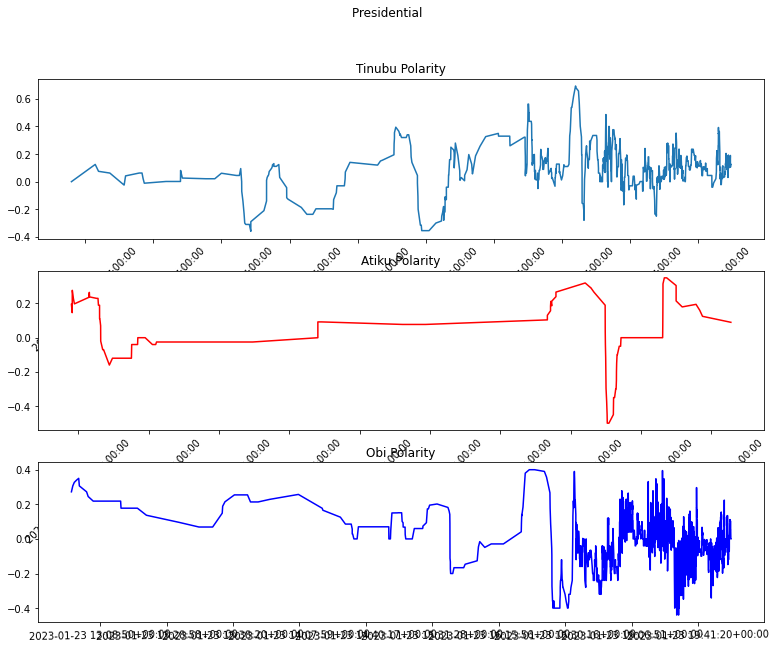

In [64]:
fig, axes = plt.subplots(3, 1, figsize=(13, 10))
axes[0].plot(Tinubu['Timestamp'], Tinubu['MA Polarity'])
axes[0].set_title("\n".join(["Tinubu Polarity"]))
axes[0].set_xticklabels(Tinubu['Timestamp'], rotation=45)

axes[1].plot(Atiku['Timestamp'], Atiku['MA Polarity'], color='red')
axes[1].set_title("\n".join(["Atiku Polarity"]))
axes[1].set_xticklabels(Atiku['Timestamp'], rotation=45)

axes[2].plot(Obi['Timestamp'], Obi['MA Polarity'], color='blue')
axes[2].set_title("\n".join(["Obi Polarity"]))
axes[2].set_xticklabels(Obi['Timestamp'], rotation=1)

fig.suptitle("\n".join(["Presidential "]), y=0.98)
plt.show()

In [65]:
import plotly.express as px

fig = px.line(Tinubu, x='Timestamp', y='MA Polarity', title="Tinubu Polarity")
fig.update_xaxes(title_text="Timestamp", tickangle=45)

fig2 = px.line(Atiku, x='Timestamp', y='MA Polarity', title="Atiku Polarity")
fig2.update_xaxes(title_text="Timestamp", tickangle=45)

fig3 = px.line(Obi, x='Timestamp', y='MA Polarity', title="Obi Polarity")
fig3.update_xaxes(title_text="Timestamp", tickangle=45)

fig.show()
fig2.show()
fig3.show()


In [66]:
from wordcloud import WordCloud, STOPWORDS

there have95950 words in all text 


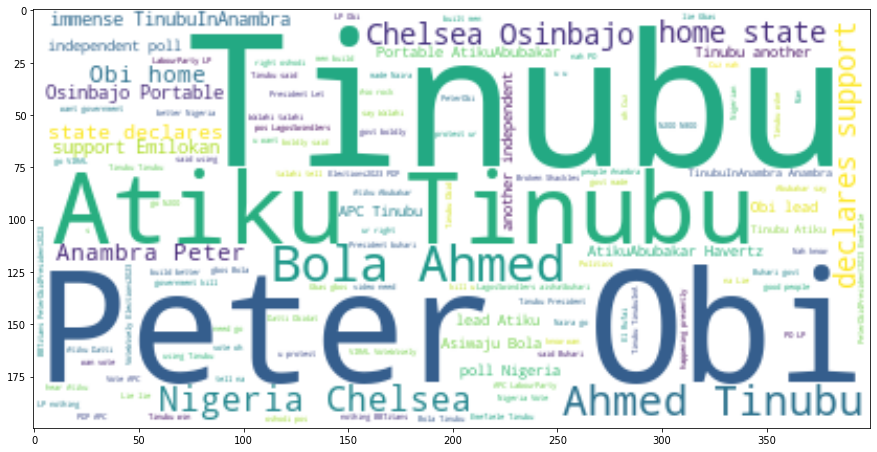

In [67]:

text=" ".join(text for text in tinubu_["Processed Tweet"])
text=" ".join(filter(lambda x:x[0]!='@', text.split()))
import re
text=re.sub(r"http\S+", "", text)
print("there have{} words in all text ".format(len(text)))
WC=WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)
plt.figure(figsize =(15,10))
plt.imshow(WC, interpolation='bilinear')


there have 13116 words in all text 


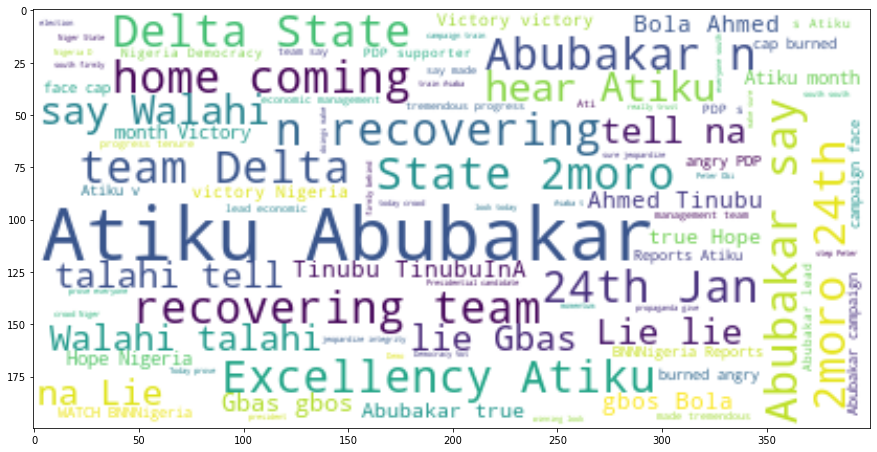

In [68]:

text=" ".join(text for text in atiku_["Processed Tweet"])
text=" ".join(filter(lambda x:x[0]!='@', text.split()))
import re
text=re.sub(r"http\S+", "", text)
print("there have {} words in all text ".format(len(text)))
WC=WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)
plt.figure(figsize =(15,10))
plt.imshow(WC, interpolation='bilinear')

there have 375645 words in all text 


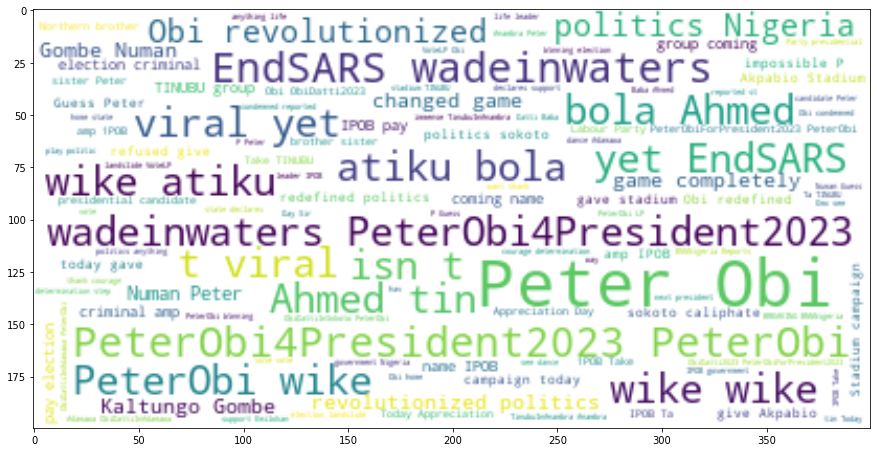

In [69]:

text=" ".join(text for text in obi_["Processed Tweet"])
text=" ".join(filter(lambda x:x[0]!='@', text.split()))
import re
text=re.sub(r"http\S+", "", text)
print("there have {} words in all text ".format(len(text)))
WC=WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)
plt.figure(figsize =(15,10))
plt.imshow(WC, interpolation='bilinear')